# **Part 1** - K Nearest Neighbours

# Installing necessary libraries

In [1]:
!pip install scikit-learn

# Loading Dataset

In [2]:
import numpy as np
data=np.load("data.npy",allow_pickle=True)

# Dataset Statistics:

## Each row in data has 5 columns

### 1- ID

### 2- ResNET embeddings (1024)

### 3- VIT embeddings (512)

### 4- ground truth, label name

### 5- time (to be ignored)

# Data Visualization

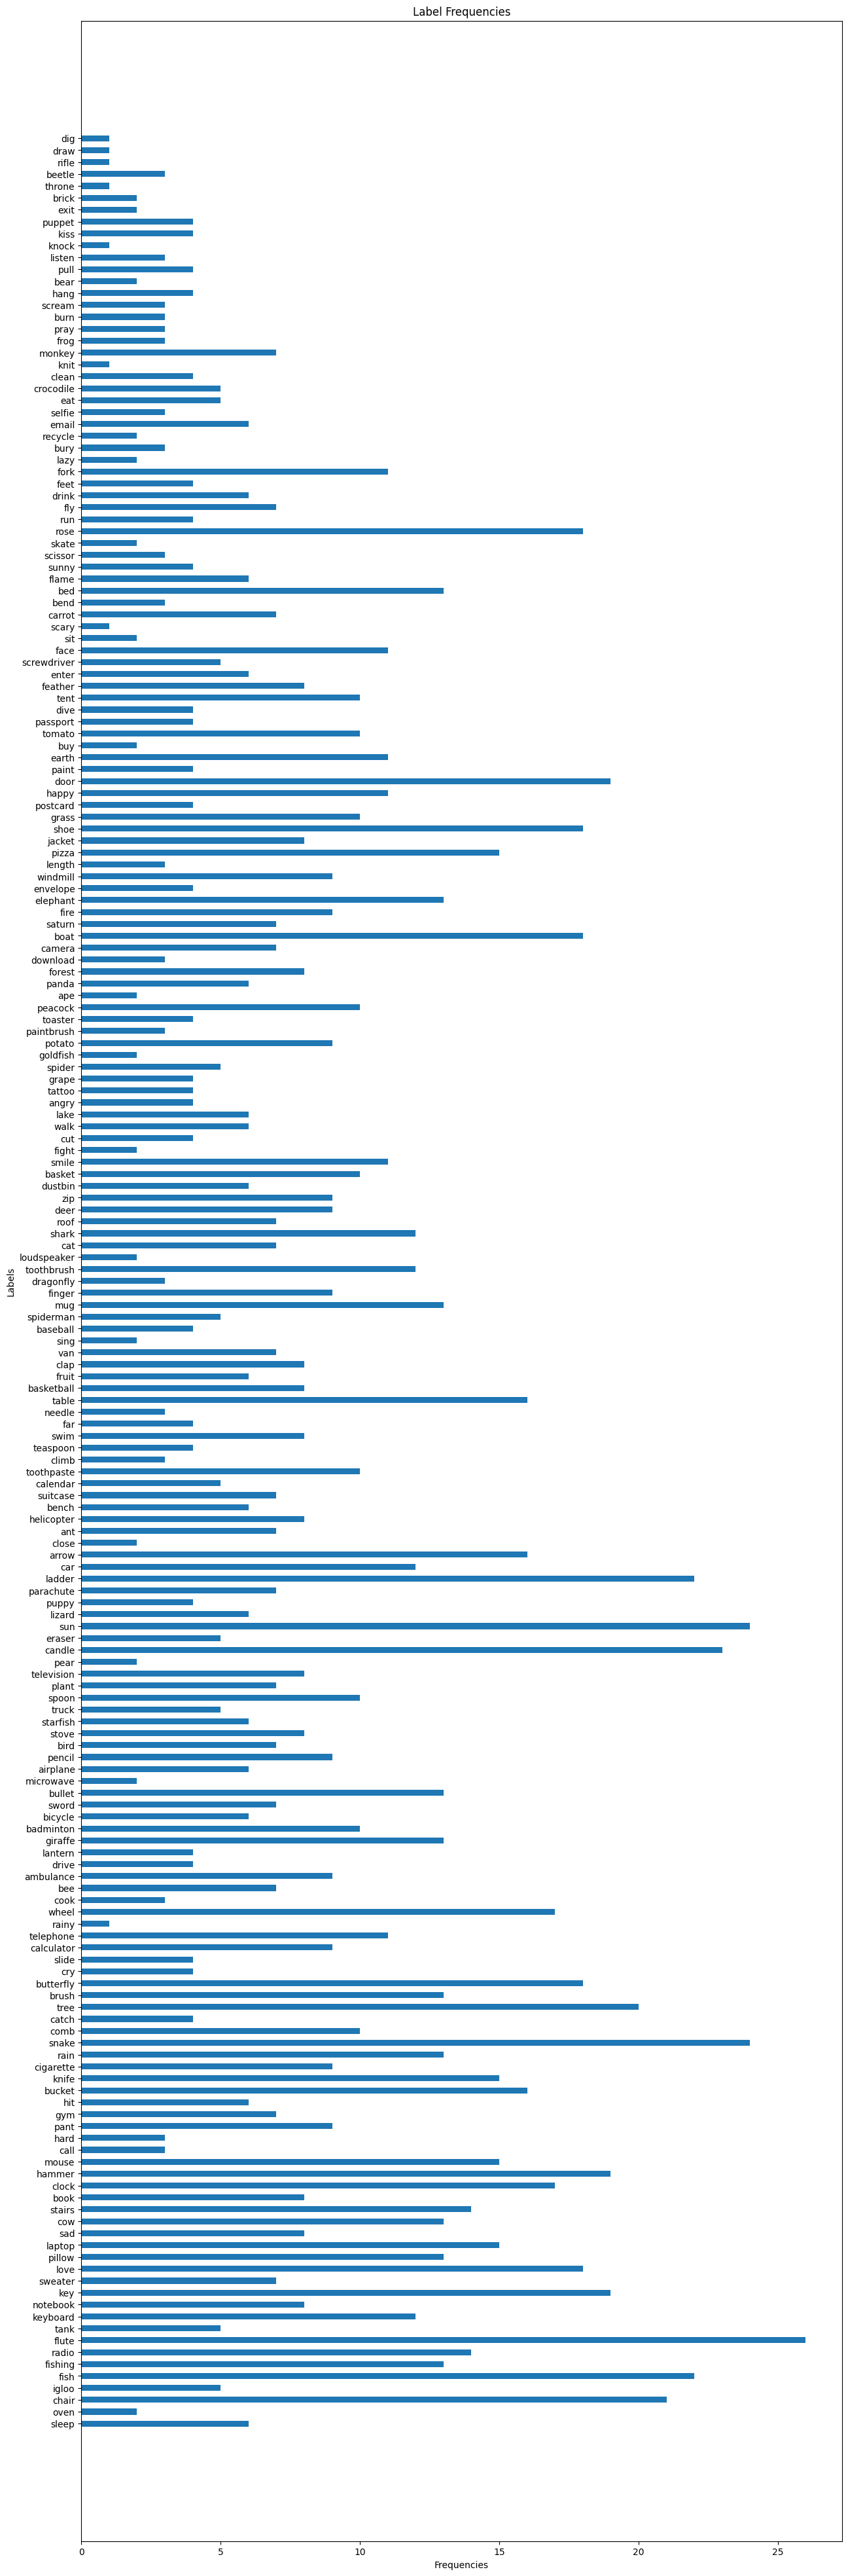

In [3]:
import matplotlib.pyplot as plt
frequencies={}
for i in data:
    if i[3] not in frequencies.keys():
        frequencies[i[3]]=1
    else:
        frequencies[i[3]]+=1


# Extract labels and frequencies
labels = list(frequencies.keys())
frequencies = list(frequencies.values())

# Plot the horizontal bar graph
plt.figure(figsize=(15, 50))  # Adjust the width and height as needed
plt.barh(labels, frequencies, height=0.5)
y_positions = [i for i in range(len(labels))]
plt.yticks(y_positions, labels)  # Assign positions and labels
plt.xlabel('Frequencies')
plt.ylabel('Labels')
plt.title('Label Frequencies')
plt.show()


## Dataset Splitting

In [4]:
train_data=[]
validation_data=[]

# we will split the data in train:validation in 80:20 respectively

train_data=data[:1200]
validation_data=data[1200:]

# print(len(train_data),len(test_data),len(validation_data))

# Defining K Nearest Neighbours Class

In [5]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

class KNN():

    def __init__(self, encoder_type, k, distance_metric):
        self.encoding=encoder_type
        self.dist_metric=distance_metric
        self.k=k

    def get_output(self, entry, train_data):
        result=self.find_distance(entry,train_data)
        # print(result)
        result_k=self.get_top_k(result)
        # print(result_k)
        prediction=self.get_prediction(result_k)
        return prediction

    def find_distance(self, entry, train_data):
        result=[]
        if(self.dist_metric == 0):
            # Manhattan
            sum=0
            for train in train_data:
                res=np.abs(entry[self.encoding+1][0]-train[self.encoding+1][0])
                sum=np.sum(res)
                result.append([sum,train[3]])

        if(self.dist_metric == 1):
            # Euclidean
            sum=0
            for train in train_data:
                res=np.abs(entry[self.encoding+1][0]-train[self.encoding+1][0])
                res=np.square(res)
                sum=np.sum(res)
                sum=np.sqrt(sum)
                result.append([sum,train[3]])
            # return sum
        if(self.dist_metric == 2):
            # Cosine distance
            sum=0
            for train in train_data:
                res=np.dot(entry[self.encoding+1][0],train[self.encoding+1][0])
                mod_train=np.sqrt(np.sum(np.square(train[self.encoding+1][0])))
                mod_test=np.sqrt(np.sum(np.square(entry[self.encoding+1][0])))
                sum=res/(mod_train*mod_test)
                sum=1-sum
                result.append([sum,train[3]])
        # print(result)
        return result

    def get_top_k(self,result):
        result.sort()
        result=result[:self.k]
        # print(result)
        return result

    def get_prediction(self,result):
        label_counts={}
        for i in result:
            if i[1] not in label_counts.keys():
                label_counts[i[1]]=1
            else:
                label_counts[i[1]]+=1
            #     print(label_counts,end="\t")
            #     print(entry[3])
        max_label=list(label_counts.keys())[0]
        max_ct=label_counts[list(label_counts.keys())[0]]
        for i in label_counts.keys():
            if label_counts[i]>max_ct:
                max_ct=label_counts[i]
                max_label=i
        max_labels=[]
        for i in label_counts.keys():
            if(i==max_label):
                max_labels.append(i)
        prediction=""
        for i in result:
            if i[1] in max_labels:
                prediction=i[1]
                break
        # print(prediction)
        return prediction

    def get_metrics(self,y_pred,y_true):
        f1=f1_score(y_true,y_pred, average="weighted", zero_division=1)
        rec=recall_score(y_true,y_pred, average="weighted", zero_division=1)
        prec=precision_score(y_true,y_pred, average="weighted", zero_division=1)
        acc=accuracy_score(y_true,y_pred)
        return [f1,rec,prec,acc]



## Running Validation dataset on the Model

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

total=0
y_true=[]
y_pred=[]
output=[]
k_arr=[]
acc_arr=[]
for enc in range(2):
    for d in range(3):
        for k in range(1, 20):
            y_true = []
            y_pred = []
            total = 0
            for entry in validation_data:
                knn = KNN(enc, k, d)
                prediction = knn.get_output(entry, train_data)
                total += 1
                y_pred.append(prediction)
                y_true.append(entry[3])
            f1,recall,precision,accuracy=knn.get_metrics(y_true,y_pred)
            output.append([accuracy,[k,enc,d,f1,recall,precision]])
            if enc==1 and d==1:
                k_arr.append(k)
                acc_arr.append(accuracy)
            # print("k =",k,"\tenc =",enc,"\td =",d,'\t', accuracy)


# Top 20 Triplets

In [7]:
output.sort(reverse=True)
# print(output[:20])
encodings=["ResNET", "VIT"]
distances=["Manhattan", "Eucledian", "Cosine Similarity"]

for i in range(20):
    out=output[i]
    print("K =",out[1][0],'\t',"Encoding =",encodings[out[1][1]],'\t',"Distance Metric =",distances[out[1][2]])


K = 10 	 Encoding = VIT 	 Distance Metric = Eucledian
K = 9 	 Encoding = VIT 	 Distance Metric = Eucledian
K = 8 	 Encoding = VIT 	 Distance Metric = Eucledian
K = 8 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 9 	 Encoding = VIT 	 Distance Metric = Cosine Similarity
K = 9 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 7 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 6 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 11 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 10 	 Encoding = VIT 	 Distance Metric = Cosine Similarity
K = 18 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 17 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 14 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 11 	 Encoding = VIT 	 Distance Metric = Cosine Similarity
K = 11 	 Encoding = VIT 	 Distance Metric = Eucledian
K = 10 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 8 	 Encoding = VIT 	 Distance Metric = Cosine Similarity
K = 5 	 Encoding = VIT 	 Distance Metric = Manhattan
K = 4

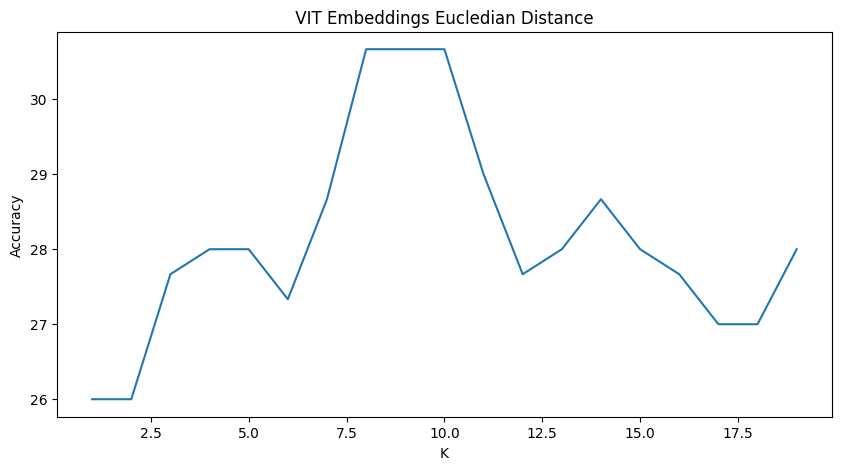

In [8]:
import matplotlib.pyplot as plt

for i in range(len(acc_arr)):
    acc_arr[i]=acc_arr[i]*100

plt.figure(figsize=(10, 5))  # Adjust the width and height as needed
plt.plot(k_arr, acc_arr)

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title(' VIT Embeddings Eucledian Distance ')
plt.show()

## Inference Times

In [9]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

inference_times=[]
models=['initial','best','default']

# for our experiment, we take k=3, encoding=0 and distance metric=0 for all cases except best case

# initial model

total=0
k=3
enc=0
d=0
y_pred=[]
y_true=[]
for entry in validation_data:
    knn = KNN(enc, k, d)
    start=time.time()
    prediction = knn.get_output(entry, train_data)
    end=time.time()
    total+=end-start
    y_pred.append(prediction)
    y_true.append(entry[3])
f1,recall,precision,accuracy=knn.get_metrics(y_true,y_pred)
# print(total)
inference_times.append(total)

# best model

total=0
k=output[0][1][0]
enc=output[0][1][1]
d=output[0][1][2]
y_pred=[]
y_true=[]
for entry in validation_data:
    knn = KNN(enc, k, d)
    start=time.time()
    prediction = knn.get_output(entry, train_data)
    end=time.time()
    total+=end-start
    y_pred.append(prediction)
    y_true.append(entry[3])
f1,recall,precision,accuracy=knn.get_metrics(y_true,y_pred)
# print(total)
inference_times.append(total)

# sklearn default knn model

total=0
X=[]
Y=[]

for i in train_data:
    X.append(i[2][0])
    Y.append(i[3][0])

for i in validation_data:
    X.append(i[2][0])
    Y.append(i[3][0])
X=np.array(X)
Y=np.array(Y)
# x_train=np.array(x_train)
# y_train=np.array(y_train)
# x_test=np.array(x_test)
# y_test=np.array(y_test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

k=3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
# print(X[0])
knn_classifier.fit(X_train, y_train)
for i in X_test:
    start = time.time()
    prediction = knn_classifier.predict([i])
    end = time.time()
    total+=end-start
# print(total)

inference_times.append(total)



# Visualizing Inference time of Initial KNN model, Best KNN model and Sklearn KNN model

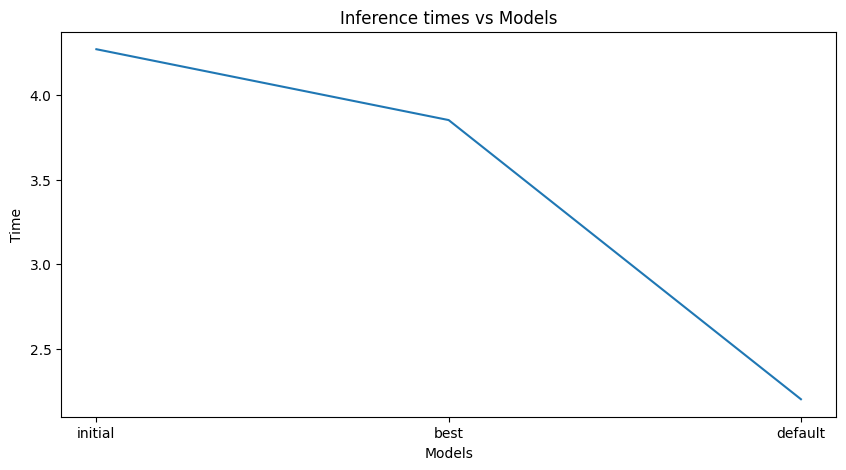

In [10]:
plt.figure(figsize=(10, 5))  # Adjust the width and height as needed
plt.plot(models, inference_times)

plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Inference times vs Models')
plt.show()

# Collecting inference times for different train data sizes

In [11]:
initial=[]
best=[]
default=[]

val_percent=[10,20,30,40,50]
for i in val_percent:
    tot=len(data)
    train=data[:int(tot*(100-i)/100)]
    val=data[int(tot*(100-i)/100):]

    # print(len(train))
    # print(len(val))
    # continue

    # initial

    total=0
    k=3
    enc=0
    d=0
    y_pred=[]
    y_true=[]
    for entry in val:
        knn = KNN(enc, k, d)
        start=time.time()
        prediction = knn.get_output(entry, train)
        end=time.time()
        total+=end-start
        y_pred.append(prediction)
        y_true.append(entry[3])
    f1,recall,precision,accuracy=knn.get_metrics(y_true,y_pred)
    initial.append(total)

    # best

    total=0
    k=3
    enc=0
    d=0
    y_pred=[]
    y_true=[]
    for entry in val:
        knn = KNN(enc, k, d)
        start=time.time()
        prediction = knn.get_output(entry, train)
        end=time.time()
        total+=end-start
        y_pred.append(prediction)
        y_true.append(entry[3])
    f1,recall,precision,accuracy=knn.get_metrics(y_true,y_pred)
    best.append(total)

    # default

    total=0
    X=[]
    Y=[]

    for i in train:
        X.append(i[2][0])
        Y.append(i[3][0])

    for i in val:
        X.append(i[2][0])
        Y.append(i[3][0])
    X=np.array(X)
    Y=np.array(Y)
    # x_train=np.array(x_train)
    # y_train=np.array(y_train)
    # x_test=np.array(x_test)
    # y_test=np.array(y_test)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    k=3
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # print(X[0])
    knn_classifier.fit(X_train, y_train)
    for i in X_test:
        start = time.time()
        prediction = knn_classifier.predict([i])
        end = time.time()
        total+=end-start
    # print(total)

    default.append(total)

    # print(initial)
    # print(best)
    # print(default)


# Visualizing Inference times for Different Train and Validation data split percentages

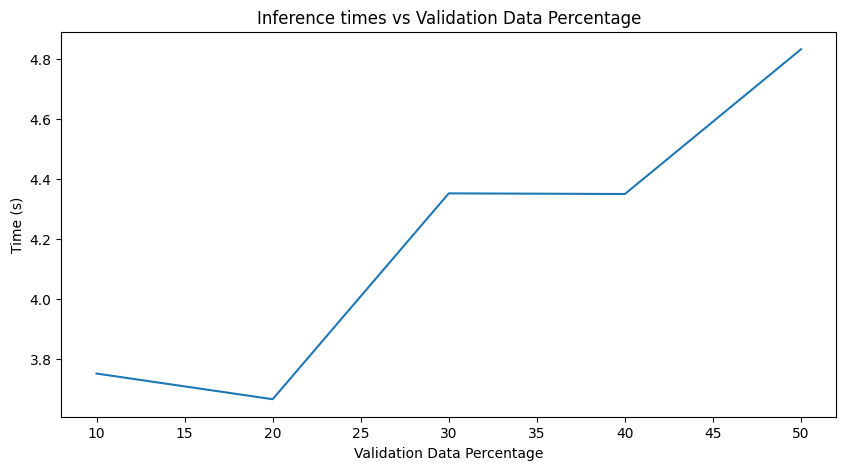

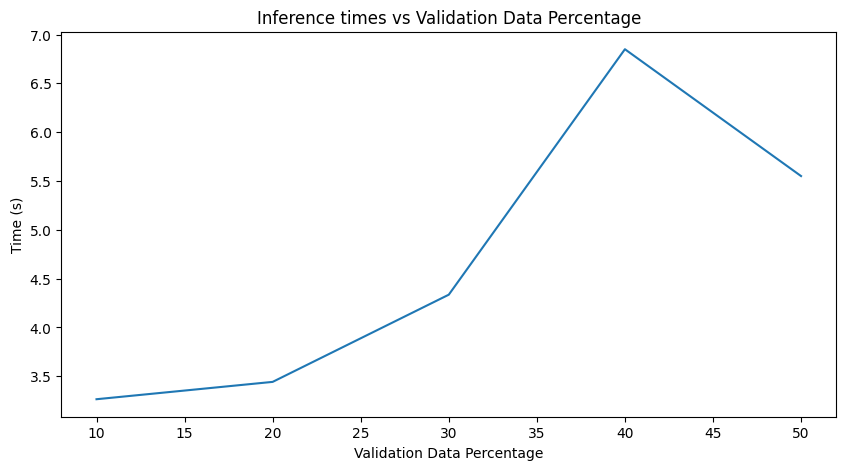

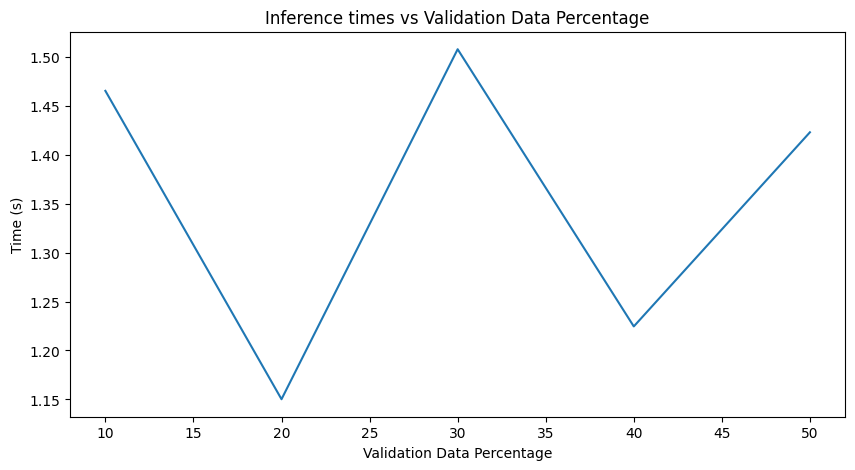

In [12]:
plt.figure(figsize=(10, 5))  # Adjust the width and height as needed
plt.plot(val_percent, initial)

plt.xlabel('Validation Data Percentage')
plt.ylabel('Time (s)')
plt.title('Inference times vs Validation Data Percentage')
plt.show()

plt.figure(figsize=(10, 5))  # Adjust the width and height as needed
plt.plot(val_percent, best)

plt.xlabel('Validation Data Percentage')
plt.ylabel('Time (s)')
plt.title('Inference times vs Validation Data Percentage')
plt.show()

plt.figure(figsize=(10, 5))  # Adjust the width and height as needed
plt.plot(val_percent, default)

plt.xlabel('Validation Data Percentage')
plt.ylabel('Time (s)')
plt.title('Inference times vs Validation Data Percentage')
plt.show()

# **Part 2** - Decision Trees

# Installing necessary libraries

In [13]:
!pip install pandas
!pip install scikit-multilearn

# Loading Dataset

In [14]:
import pandas as pd
data = pd.read_csv('advertisement.csv')
# data

# Preprocessing of Dataset

In [15]:
classes={}
for i in data.head():
    # print(i)
    classes[i]={}

features=list(classes.keys())

id_to_class={}
id=0
for i in data.head():
    id_to_class[id]=i
    id+=1

for i in data.iterrows():
    for j in range(10):
        # print(i[1][j],end=" ")
        if(i[1][j] not in classes[id_to_class[j]]):
            # classes[id_to_class[j]].append(i[1][j])
            classes[id_to_class[j]][i[1][j]]=1
        else:
            classes[id_to_class[j]][i[1][j]]+=1
    l=i[1][10].split(' ')
    for ll in l:
        if(ll not in classes['labels']):
            # classes['labels'].append(ll)
            classes['labels'][ll]=1
        else:
            classes['labels'][ll]+=1
    # break

# Dataset Visualization

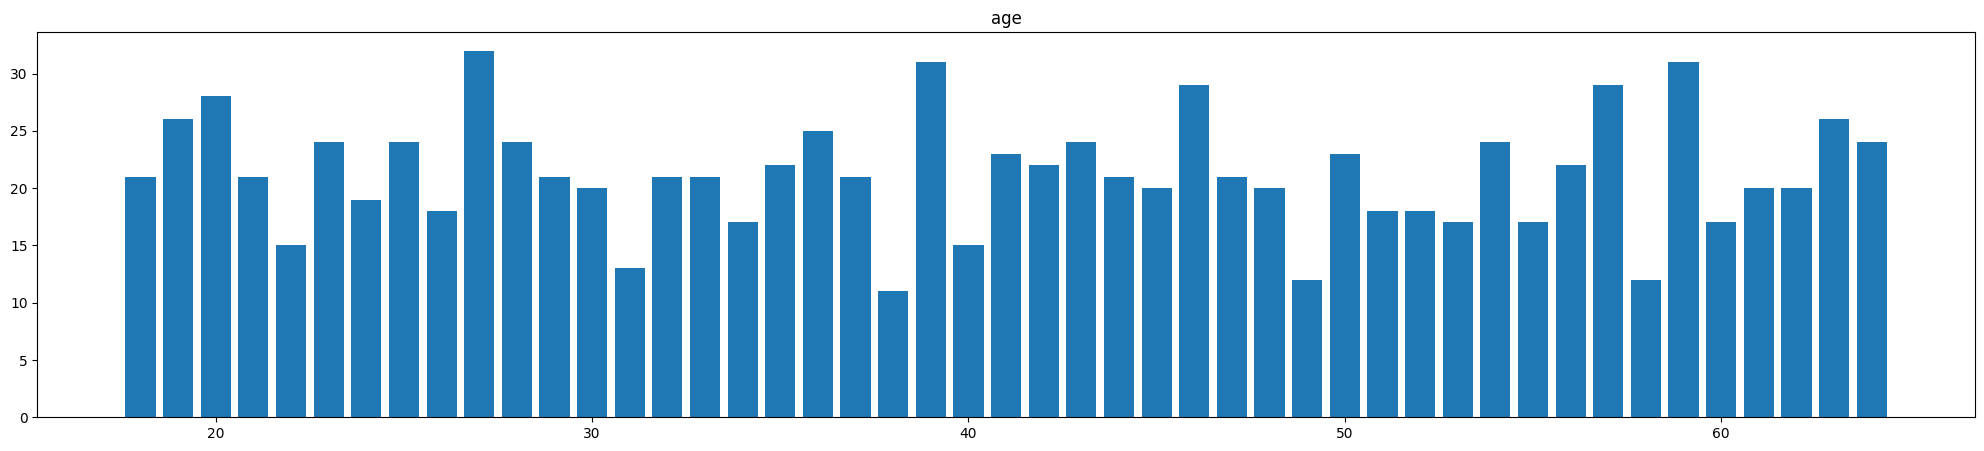

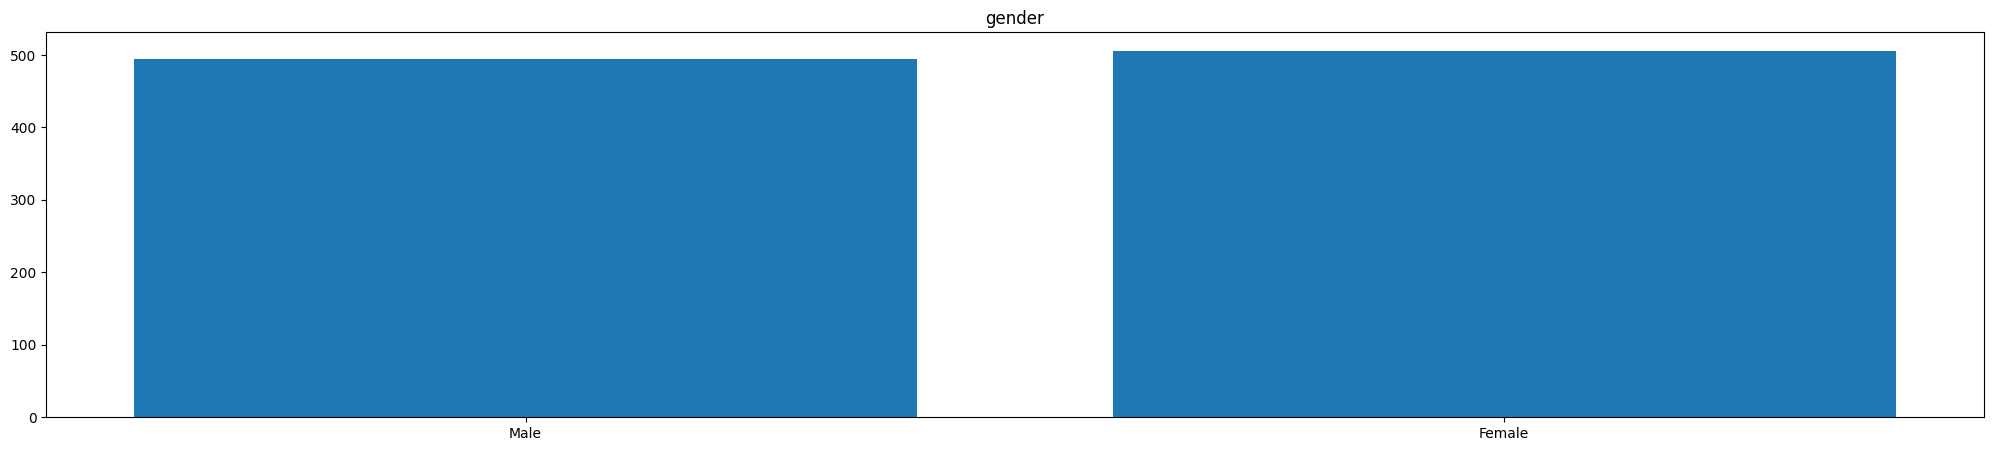

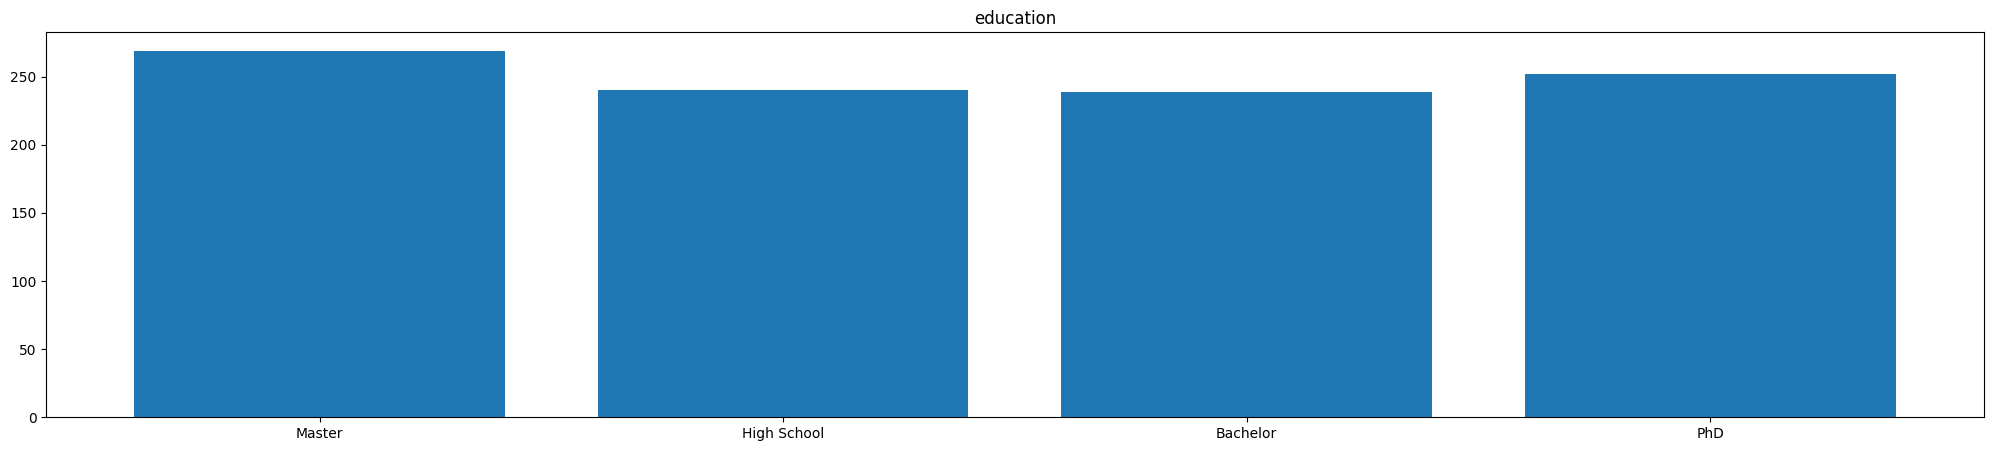

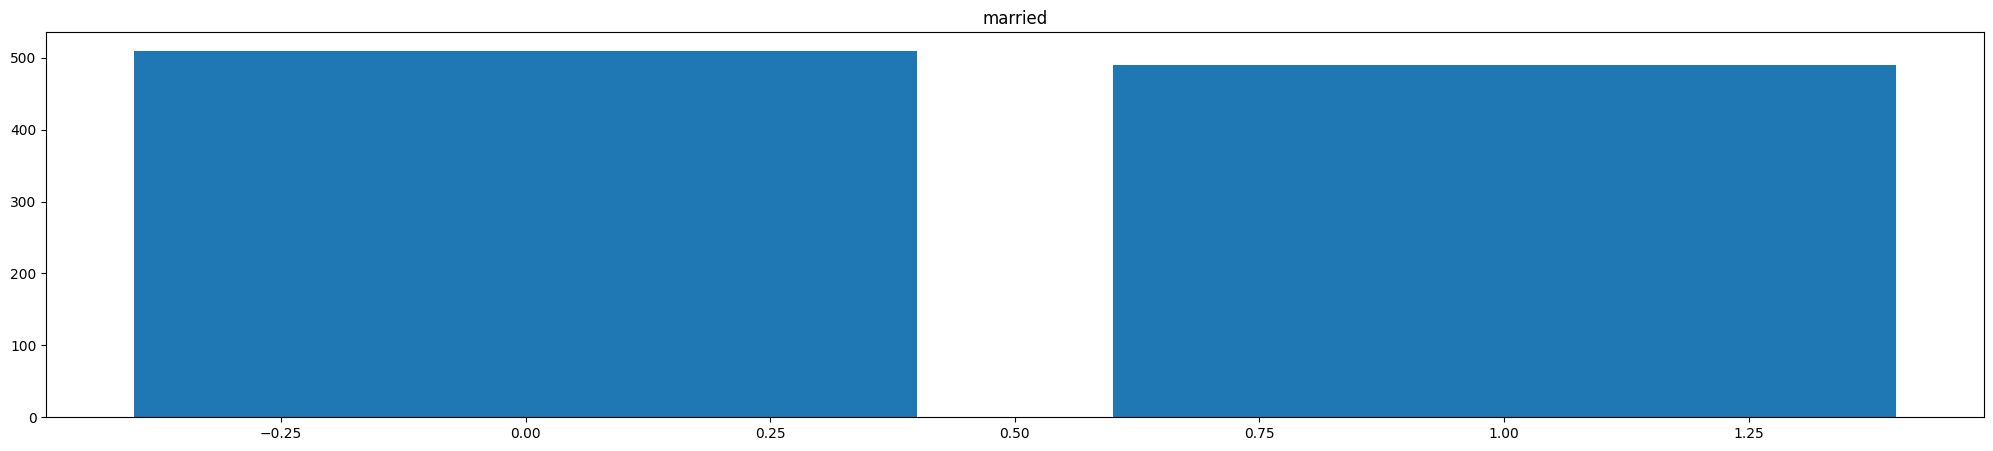

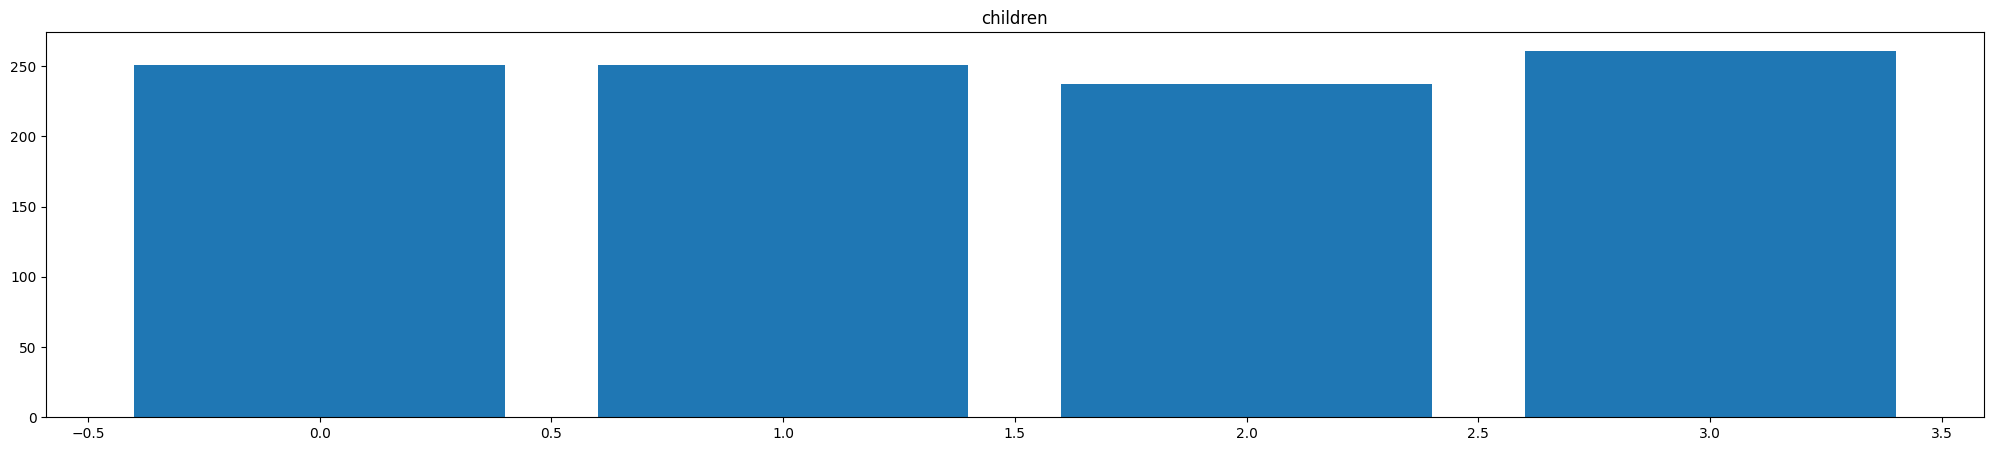

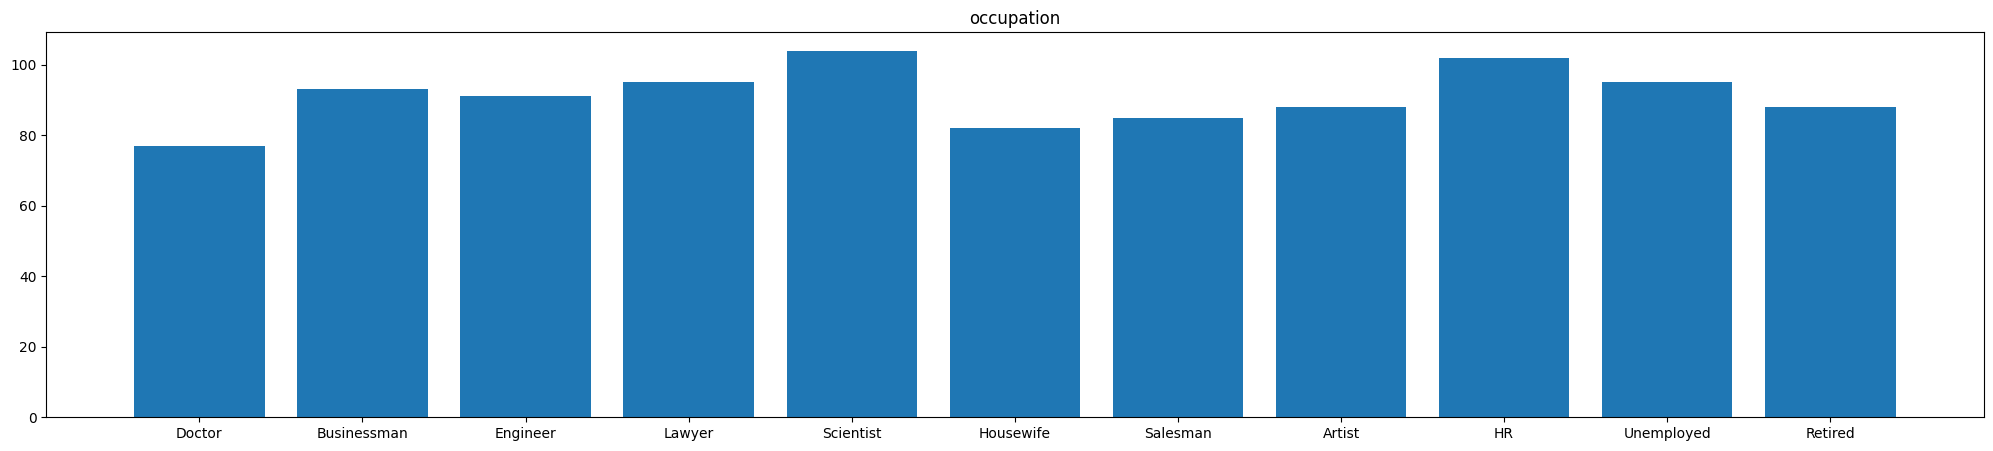

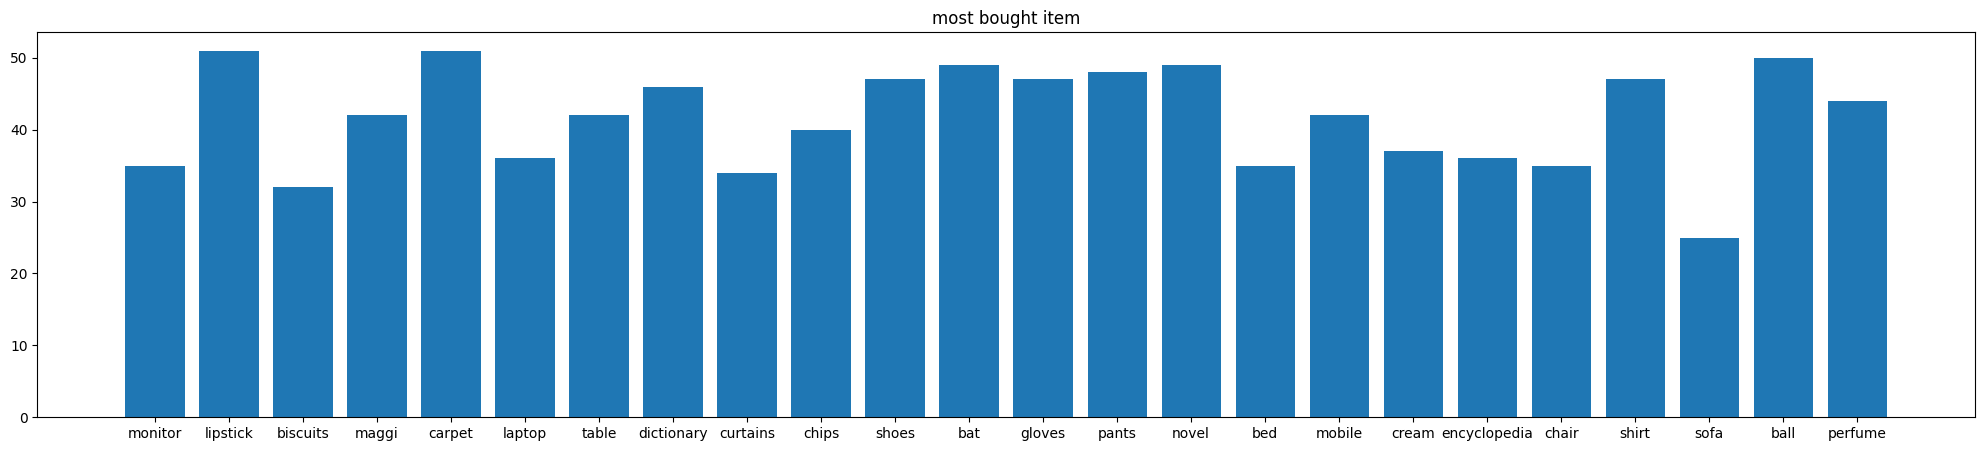

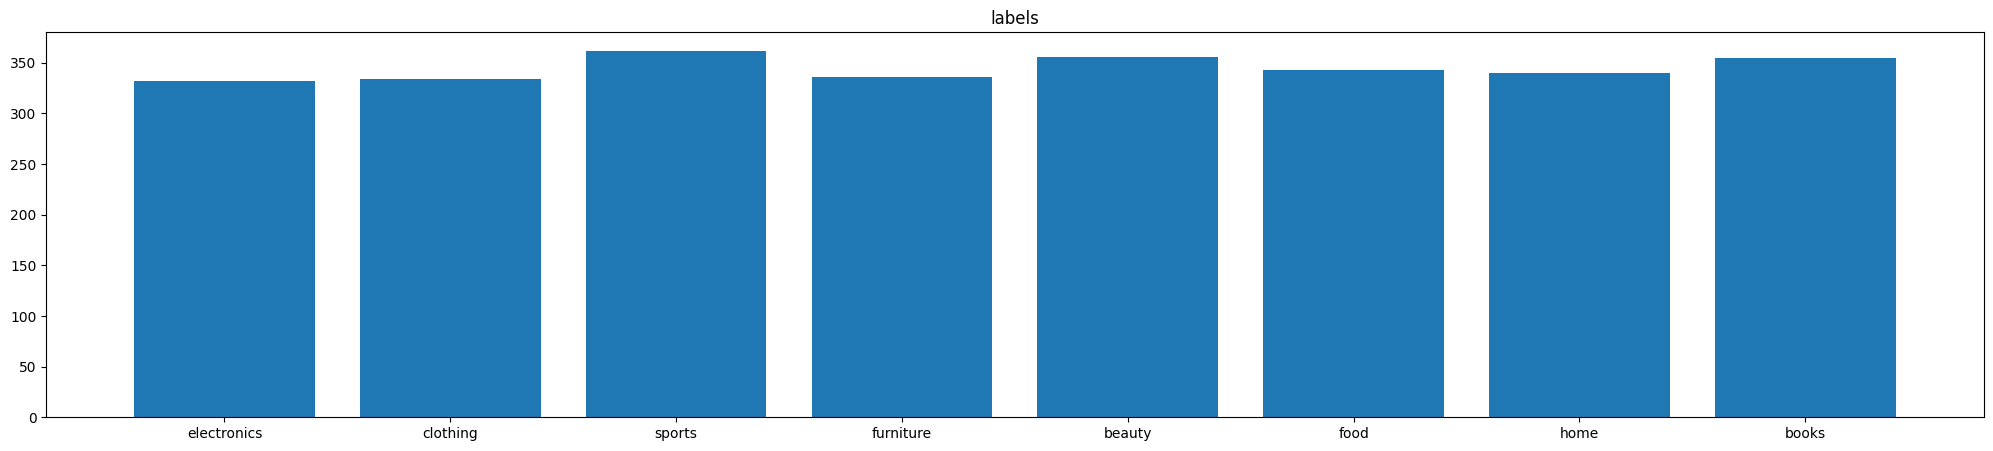

In [16]:
import matplotlib.pyplot as plt

for i in classes:
    # print(classes[i].keys())
    # print(classes[i].values())
    if i == "income" or i == "city" or i == "purchase_amount":
        continue
    # print(i)
    labels = list(classes[i].keys())
    frequencies = list(classes[i].values())
    plt.figure(figsize=(25, 5))
    plt.bar(labels,frequencies)
    plt.title(i)
    # plt.show()


# Encoding String values into Numeric Values

In [17]:
encoding={}
for i in classes:
    # print(classes[i].keys())
    # print(list(classes[i].keys())[0])
    # if(list(classes[i].keys())[0])
    if type(list(classes[i].keys())[0]) in (int, float, complex):
        continue
    # else:
    #     continue
    encoding[i]={}
    ind=0
    for j in classes[i]:
        encoding[i][j]=ind
        ind+=1
    # for j in classes[i]:

    #     print(j)
# encoding

# Creating X and Y (Feature and Labels) datasets

In [18]:
dataset_X=[]
for i in data.iterrows():
    # print(i[1][:-1])
    # print()
    dataset_X.append([])
    # #for j in i:
    # dataset_X[len(dataset_X)-1].append(i[1][:-1])
    for num in range(len(i[1][:-1])):
        # print(j)
        # print(features[num])
        # if()
        if(features[num] in encoding):
            # print(encoding[features[num]][i[1][:-1][num]])
            # print(i[1][:-1][num])
            dataset_X[len(dataset_X)-1].append(encoding[features[num]][i[1][:-1][num]])
        else:
            dataset_X[len(dataset_X)-1].append(i[1][:-1][num])


In [19]:
dataset_Y=[]
for i in data.iterrows():
    dataset_Y.append([0] * len(classes['labels']))
    # print(dataset_Y[len(dataset_Y)-1])
    # print(i[1][-1])
    ls=i[1][-1].split(' ')
    # print(ls)
    for l in ls:
        dataset_Y[len(dataset_Y)-1][encoding['labels'][l]]=1
# print(dataset_Y)

# Splitting dataset into Train and Validation

In [20]:
import numpy as np

# train:test = 80:20


train_x=np.array(dataset_X[:800])
train_y=np.array(dataset_Y[:800])
test_x=np.array(dataset_X[800:])
test_y=np.array(dataset_Y[800:])



# print(len(test_x),len(test_y))

# Defining Decision Tree Classifier Class for MultiOutput and Powerset Formulations

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from skmultilearn.problem_transform import LabelPowerset

class MultiOutput():
    def __init__(self, max_depth, max_features, criterion):
        self.max_depth=max_depth
        self.max_features=max_features
        self.criterion=criterion

    def get_result(self,x_train,y_train,x_test):
        classifier = DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features, criterion=self.criterion)
        classifier= MultiOutputClassifier(classifier)
        classifier.fit(x_train, y_train)
        result=self.predict(x_test,classifier)
        return result

    def predict(self,x_test,classifier):
        predictions = classifier.predict(x_test)
        return predictions

    def get_metrics(self,pred,actual):
        f1_macro=f1_score(actual,pred, average="macro", zero_division=1)
        f1_micro=f1_score(actual,pred, average="micro", zero_division=1)
        rec=recall_score(actual,pred, average="weighted", zero_division=1)
        prec=precision_score(actual,pred, average="weighted", zero_division=1)
        acc=accuracy_score(actual,pred)
        confusion_matrix=multilabel_confusion_matrix(actual,pred)
        return [acc,f1_macro,f1_micro,prec,rec,confusion_matrix]


class LabelPowerSet():
    def __init__(self, max_depth, max_features, criterion):
        self.max_depth=max_depth
        self.max_features=max_features
        self.criterion=criterion

    def get_result(self,x_train,y_train,x_test):
        classifier=DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features, criterion=self.criterion)
        classifier=LabelPowerset(classifier)
        classifier.fit(x_train, y_train)
        result=self.predict(x_test,classifier)
        return result

    def predict(self,x_test,classifier):
        predictions = classifier.predict(x_test)
        return predictions

    def get_metrics(self,pred,actual):
        f1_macro=f1_score(actual,pred, average="macro", zero_division=1)
        f1_micro=f1_score(actual,pred, average="micro", zero_division=1)
        rec=recall_score(actual,pred, average="weighted", zero_division=1)
        prec=precision_score(actual,pred, average="weighted", zero_division=1)
        acc=accuracy_score(actual,pred)
        confusion_matrix=multilabel_confusion_matrix(actual,pred)
        return [acc,f1_macro,f1_micro,prec,rec,confusion_matrix]

In [22]:
max_depth=[3,5,10,20,30]
max_features=[3,5,7,9,11]
criterias=['gini','entropy']
output_multi=[]

for criterion in criterias:
    for depth in max_depth:
        for feature in max_features:
            multi_output=MultiOutput(depth,feature,criterion)
            predictions=multi_output.get_result(train_x,train_y,test_x)
            accuracy,f1_macro,f1_micro,precision,recall,conf=multi_output.get_metrics(test_y,predictions)
            output_multi.append([accuracy,[criterion,depth,feature,f1_macro,f1_micro,precision,recall,conf]])


In [23]:
max_depth=[3,5,10,20,30]
max_features=[3,5,7,9,11]
criterias=['gini','entropy']
output_powerset=[]

for criterion in criterias:
    for depth in max_depth:
        for feature in max_features:
            label_powerset=LabelPowerSet(depth,feature,criterion)
            predictions=label_powerset.get_result(train_x,train_y,test_x)
            accuracy,f1_macro,f1_micro,precision,recall,conf=label_powerset.get_metrics(test_y,predictions)
            output_powerset.append([accuracy,[criterion,depth,feature,f1_macro,f1_micro,precision,recall,conf]])

# Printing 3 Best performing set of hyperparameters based on Accuracy, Micro F1 and Macro F1

In [24]:
print("MultiOutput Results: \n\n")

output_multi.sort(reverse=True)

print("Based on Accuracy\n")

for i in range(3):
    out=output_multi[i]
    print("Criterion =",out[1][0],(10-len(str(out[1][0])))*' ',"Depth =",out[1][1],(5-len(str(out[1][1])))*' ',"Feature =",out[1][2],(5-len(str(out[1][2])))*' ',"F1 Macro = ",out[1][3],(20-len(str(out[1][3])))*' ',"F1 Micro = ",out[1][4],(20-len(str(out[1][4])))*' ',"Precision = ",out[1][5],(20-len(str(out[1][5])))*' ',"Recall = ",out[1][6],(20-len(str(out[1][6])))*' ',"Accuracy = ",out[0])

best_multi=[output_multi[0][1][0],output_multi[0][1][1],output_multi[0][1][2]]

print()

print("Based on F1 Macro\n")

f1_macro_multi=[]
for i in output_multi:
    f1_macro_multi.append([i[1][3],i[1],i[0]])
f1_macro_multi.sort(reverse=True)
for i in range(3):
    out=f1_macro_multi[i]
    print("Criterion =",out[1][0],(10-len(str(out[1][0])))*' ',"Depth =",out[1][1],(5-len(str(out[1][1])))*' ',"Feature =",out[1][2],(5-len(str(out[1][2])))*' ',"F1 Macro = ",out[1][3],(20-len(str(out[1][3])))*' ',"F1 Micro = ",out[1][4],(20-len(str(out[1][4])))*' ',"Precision = ",out[1][5],(20-len(str(out[1][5])))*' ',"Recall = ",out[1][6],(20-len(str(out[1][6])))*' ',"Accuracy = ",out[-1])

print()

print("Based on F1 Micro\n")

f1_micro_multi=[]
for i in output_multi:
    f1_micro_multi.append([i[1][4],i[1],i[0]])
f1_micro_multi.sort(reverse=True)
for i in range(3):
    out=f1_micro_multi[i]
    print("Criterion =",out[1][0],(10-len(str(out[1][0])))*' ',"Depth =",out[1][1],(5-len(str(out[1][1])))*' ',"Feature =",out[1][2],(5-len(str(out[1][2])))*' ',"F1 Macro = ",out[1][3],(20-len(str(out[1][3])))*' ',"F1 Micro = ",out[1][4],(20-len(str(out[1][4])))*' ',"Precision = ",out[1][5],(20-len(str(out[1][5])))*' ',"Recall = ",out[1][6],(20-len(str(out[1][6])))*' ',"Accuracy = ",out[-1])


MultiOutput Results: 


Based on Accuracy

Criterion = entropy     Depth = 5      Feature = 7      F1 Macro =  0.3684001206147045    F1 Micro =  0.381596752368065     Precision =  0.26774482435194497   Recall =  0.8103448275862069    Accuracy =  0.085
Criterion = entropy     Depth = 5      Feature = 11     F1 Macro =  0.46597990778412735   F1 Micro =  0.4719904648390942    Precision =  0.38641213072426334   Recall =  0.7226277372262774    Accuracy =  0.08
Criterion = entropy     Depth = 3      Feature = 7      F1 Macro =  0.2369395984114186    F1 Micro =  0.2632375189107413    Precision =  0.22741175276352643   Recall =  0.90625               Accuracy =  0.075

Based on F1 Macro

Criterion = gini        Depth = 30     Feature = 9      F1 Macro =  0.4966688913935241    F1 Micro =  0.5020242914979757    Precision =  0.5941588530965789    Recall =  0.4626865671641791    Accuracy =  0.025
Criterion = gini        Depth = 20     Feature = 7      F1 Macro =  0.49572177950424745   F1 Micro =  

In [25]:
print("Powerset Results: \n\n")

output_powerset.sort(reverse=True)

print("Based on Accuracy\n")

for i in range(3):
    out=output_powerset[i]
    print("Criterion =",out[1][0],(10-len(str(out[1][0])))*' ',"Depth =",out[1][1],(5-len(str(out[1][1])))*' ',"Feature =",out[1][2],(5-len(str(out[1][2])))*' ',"F1 Macro = ",out[1][3],(20-len(str(out[1][3])))*' ',"F1 Micro = ",out[1][4],(20-len(str(out[1][4])))*' ',"Precision = ",out[1][5],(20-len(str(out[1][5])))*' ',"Recall = ",out[1][6],(20-len(str(out[1][6])))*' ',"Accuracy = ",out[0])

print()

best_powerset=[output_powerset[0][1][0],output_powerset[0][1][1],output_powerset[0][1][2]]

print("Based on F1 Macro\n")

f1_macro_powerset=[]
for i in output_powerset:
    f1_macro_powerset.append([i[1][3],i[1],i[0]])
f1_macro_powerset.sort(reverse=True)
for i in range(3):
    out=f1_macro_powerset[i]
    print("Criterion =",out[1][0],(10-len(str(out[1][0])))*' ',"Depth =",out[1][1],(5-len(str(out[1][1])))*' ',"Feature =",out[1][2],(5-len(str(out[1][2])))*' ',"F1 Macro = ",out[1][3],(20-len(str(out[1][3])))*' ',"F1 Micro = ",out[1][4],(20-len(str(out[1][4])))*' ',"Precision = ",out[1][5],(20-len(str(out[1][5])))*' ',"Recall = ",out[1][6],(20-len(str(out[1][6])))*' ',"Accuracy = ",out[-1])

print()

print("Based on F1 Micro\n")

f1_micro_powerset=[]
for i in output_powerset:
    f1_micro_powerset.append([i[1][4],i[1],i[0]])
f1_micro_powerset.sort(reverse=True)
for i in range(3):
    out=f1_micro_powerset[i]
    print("Criterion =",out[1][0],(10-len(str(out[1][0])))*' ',"Depth =",out[1][1],(5-len(str(out[1][1])))*' ',"Feature =",out[1][2],(5-len(str(out[1][2])))*' ',"F1 Macro = ",out[1][3],(20-len(str(out[1][3])))*' ',"F1 Micro = ",out[1][4],(20-len(str(out[1][4])))*' ',"Precision = ",out[1][5],(20-len(str(out[1][5])))*' ',"Recall = ",out[1][6],(20-len(str(out[1][6])))*' ',"Accuracy = ",out[-1])


Powerset Results: 


Based on Accuracy

Criterion = gini        Depth = 3      Feature = 11     F1 Macro =  0.26632293649101607   F1 Micro =  0.3140096618357488    Precision =  0.3895415594504686    Recall =  0.49429657794676807   Accuracy =  0.075
Criterion = gini        Depth = 3      Feature = 9      F1 Macro =  0.26632293649101607   F1 Micro =  0.3140096618357488    Precision =  0.3895415594504686    Recall =  0.49429657794676807   Accuracy =  0.075
Criterion = gini        Depth = 3      Feature = 7      F1 Macro =  0.26632293649101607   F1 Micro =  0.3140096618357488    Precision =  0.3895415594504686    Recall =  0.49429657794676807   Accuracy =  0.075

Based on F1 Macro

Criterion = gini        Depth = 20     Feature = 11     F1 Macro =  0.5123543190273413    F1 Micro =  0.5130044843049327    Precision =  0.5076979699803833    Recall =  0.52                  Accuracy =  0.035
Criterion = gini        Depth = 5      Feature = 9      F1 Macro =  0.5021439803118528    F1 Micro =  0.

# K - Fold Cross Validation

### K = 5

In [27]:
val_dataset_length=int(0.2*(len(dataset_X)))
train_x=[]
train_y=[]
# train_x=np.array(dataset_X[:800])
# train_y=np.array(dataset_Y[:800])
# test_x=np.array(dataset_X[800:])
# test_y=np.array(dataset_Y[800:])
# val_dataset_length
for start in range(0,1000,200):
    # train_x=np.array(dataset_X[0:start])
    # train_y=np.array(dataset_Y[0:start])
    # print("train",0,start)

    if(start==0):
        test_x=np.array(dataset_X[start:start+val_dataset_length])
        test_y=np.array(dataset_Y[start:start+val_dataset_length])
        # print("val",start,start+val_dataset_length)
    else:
        test_x=np.array(dataset_X[start:start+val_dataset_length])
        test_y=np.array(dataset_Y[start:start+val_dataset_length])
        # print("val",start+1,start+val_dataset_length)
    if(start+val_dataset_length==1000):
        train_x=np.array(dataset_X[start+val_dataset_length:1000]+dataset_X[0:start])
        train_y=np.array(dataset_Y[start+val_dataset_length:1000]+dataset_Y[0:start])
        # print("train",start+val_dataset_length,1000)
    else:
        train_x=np.array(dataset_X[start+val_dataset_length:1000]+dataset_X[0:start])
        train_y=np.array(dataset_Y[start+val_dataset_length:1000]+dataset_Y[0:start])
    # print(best_powerset[0],best_powerset[1],best_powerset[2])
    check_output_powerset=[]
    check_label_powerset=LabelPowerSet(best_powerset[1],best_powerset[2],best_powerset[0])
    check_predictions=check_label_powerset.get_result(train_x,train_y,test_x)
    accuracy,f1_macro,f1_micro,precision,recall,conf=check_label_powerset.get_metrics(test_y,check_predictions)
    check_output_powerset=([accuracy,[best_powerset[0],best_powerset[1],best_powerset[2],f1_macro,f1_micro,precision,recall]])
    # print(check_output_powerset)
    print("Criterion =",check_output_powerset[1][0],(10-len(str(check_output_powerset[1][0])))*' ',"Depth =",check_output_powerset[1][1],(5-len(str(check_output_powerset[1][1])))*' ',"Feature =",check_output_powerset[1][2],(5-len(str(check_output_powerset[1][2])))*' ',"F1 Macro = ",check_output_powerset[1][3],(20-len(str(check_output_powerset[1][3])))*' ',"F1 Micro = ",check_output_powerset[1][4],(20-len(str(check_output_powerset[1][4])))*' ',"Precision = ",check_output_powerset[1][5],(20-len(str(check_output_powerset[1][5])))*' ',"Recall = ",check_output_powerset[1][6],(20-len(str(check_output_powerset[1][6])))*' ',"Accuracy = ",check_output_powerset[0])

    check_output_multi=[]
    check_multi_output=MultiOutput(best_multi[1],best_multi[2],best_multi[0])
    check_predictions=check_multi_output.get_result(train_x,train_y,test_x)
    accuracy,f1_macro,f1_micro,precision,recall,conf=check_multi_output.get_metrics(test_y,check_predictions)
    check_output_multi=([accuracy,[best_multi[0],best_multi[1],best_multi[2],f1_macro,f1_micro,precision,recall]])
    # print(check_output_multi)
    print("Criterion =",check_output_multi[1][0],(10-len(str(check_output_multi[1][0])))*' ',"Depth =",check_output_multi[1][1],(5-len(str(check_output_multi[1][1])))*' ',"Feature =",check_output_multi[1][2],(5-len(str(check_output_multi[1][2])))*' ',"F1 Macro = ",check_output_multi[1][3],(20-len(str(check_output_multi[1][3])))*' ',"F1 Micro = ",check_output_multi[1][4],(20-len(str(check_output_multi[1][4])))*' ',"Precision = ",check_output_multi[1][5],(20-len(str(check_output_multi[1][5])))*' ',"Recall = ",check_output_multi[1][6],(20-len(str(check_output_multi[1][6])))*' ',"Accuracy = ",check_output_multi[0])
    print()
# print(len(train_x),len(train_y))
# print(test_x[0],train_x[0])

Criterion = gini        Depth = 3      Feature = 11     F1 Macro =  0.36598656414204567   F1 Micro =  0.39125151883353587   Precision =  0.40643089422691797   Recall =  0.5590277777777778    Accuracy =  0.08
Criterion = entropy     Depth = 5      Feature = 7      F1 Macro =  0.40313235966308864   F1 Micro =  0.41666666666666663   Precision =  0.31802485054743485   Recall =  0.7416267942583732    Accuracy =  0.105

Criterion = gini        Depth = 3      Feature = 11     F1 Macro =  0.31815225984601964   F1 Micro =  0.36192714453584013   Precision =  0.40592151473507404   Recall =  0.5220338983050847    Accuracy =  0.045
Criterion = entropy     Depth = 5      Feature = 7      F1 Macro =  0.4212017887414997    F1 Micro =  0.42473118279569894   Precision =  0.3058020842791279    Recall =  0.8404255319148937    Accuracy =  0.075

Criterion = gini        Depth = 3      Feature = 11     F1 Macro =  0.3231824850429745    F1 Micro =  0.371764705882353     Precision =  0.3845485705616218    Reca